# Tanya Ortega
# MADS 509 

# ADS 509 Module 3: Group Comparison 

The task of comparing two groups of text is fundamental to textual analysis. There are innumerable applications: survey respondents from different segments of customers, speeches by different political parties, words used in Tweets by different constituencies, etc. In this assignment you will build code to effect comparisons between groups of text data, using the ideas learned in reading and lecture.

This assignment asks you to analyze the lyrics and Twitter descriptions for the two artists you selected in Module 1. If the results from that pull were not to your liking, you are welcome to use the zipped data from the “Assignment Materials” section. Specifically, you are asked to do the following: 

* Read in the data, normalize the text, and tokenize it. When you tokenize your Twitter descriptions, keep hashtags and emojis in your token set. 
* Calculate descriptive statistics on the two sets of lyrics and compare the results. 
* For each of the four corpora, find the words that are unique to that corpus. 
* Build word clouds for all four corpora. 

Each one of the analyses has a section dedicated to it below. Before beginning the analysis there is a section for you to read in the data and do your cleaning (tokenization and normalization). 

In [5]:
import sys
!{sys.executable} -m pip install --quiet --upgrade pip
!{sys.executable} -m pip install --quiet wordcloud

import sys
!{sys.executable} -m pip install --quiet --upgrade pip
!{sys.executable} -m pip install --quiet scikit-learn

In [6]:
import os
import re
import emoji
import pandas as pd

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation
from wordcloud import WordCloud 

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer

In [7]:
# Place any addtional functions or constants you need here. 

# Some punctuation variations
punctuation = set(punctuation) # speeds up comparison
tw_punct = punctuation - {"#"}

# Stopwords
sw = stopwords.words("english")

whitespace_pattern = re.compile(r"\s+")
hashtag_pattern = re.compile(r"^#[0-9a-zA-Z]+")

# full set of emojis
all_language_emojis = set()

for country in emoji.EMOJI_DATA : 
    for em in emoji.EMOJI_DATA[country] : 
        all_language_emojis.add(em)

# functions
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity, and num_tokens most common
        tokens. Return a list of 
    """
    
    return(0)


    
def contains_emoji(s):
    
    s = str(s)
    emojis = [ch for ch in s if emoji.is_emoji(ch)]

    return(len(emojis) > 0)


def remove_stop(tokens) :
    # remove stopwords
    return(tokens)
 
def remove_punctuation(text, punct_set=tw_punct) : 
    return("".join([ch for ch in text if ch not in punct_set]))

def tokenize(text) : 
    """ Splitting on whitespace rather than the book's tokenize function. That 
        function will drop tokens like '#hashtag' or '2A', which we need for Twitter. """
    
    # return tokens
    return(text)

def prepare(text, pipeline) : 
    tokens = str(text)
    
    for transform in pipeline : 
        tokens = transform(tokens)
        
    return(tokens)

## Data Ingestion

Use this section to ingest your data into the data structures you plan to use. Typically this will be a dictionary or a pandas DataFrame.

In [11]:
from pathlib import Path

# locations
data_location = r"C:\Users\tanya\Downloads\M1 Assignment Data\M1 Results"
twitter_folder = "twitter/"
lyrics_folder  = "lyrics/"

DATA         = Path(data_location)
TWITTER_DIR  = DATA / twitter_folder
LYRICS_DIR   = DATA / lyrics_folder

artist_files = {
    "cher":  "cher_followers_data.txt",
    "robyn": "robynkonichiwa_followers_data.txt",
}

# check
print("DATA exists?     ", DATA.exists())
print("TWITTER_DIR?     ", TWITTER_DIR.exists())
print("LYRICS_DIR?      ", LYRICS_DIR.exists())

DATA exists?      True
TWITTER_DIR?      True
LYRICS_DIR?       True


In [13]:
# Load Lyrics
lyrics_dict = {}
for fp in LYRICS_DIR.glob("*.txt"):
    artist = fp.stem.replace("_lyrics", "").lower() 
    with fp.open(encoding="utf-8", errors="ignore") as f:
        lyrics_dict[artist] = {fp.stem: f.read()}

# Load Twitter Descriptions
twitter_desc = {}
for artist, filename in artist_files.items():
    fp = TWITTER_DIR / filename
    if fp.exists():
        with fp.open(encoding="utf-8", errors="ignore") as f:
            twitter_desc[artist] = [line.strip() for line in f if line.strip()]
    else:
        print(f"WARNING: {fp} not found.")

# print
print("Artists in lyrics:", list(lyrics_dict.keys()))
print("Artists in twitter:", list(twitter_desc.keys()))
print("Example lyrics titles:", [list(lyrics_dict[a].keys())[0] for a in lyrics_dict])
print("Twitter samples:", {a: twitter_desc[a][:3] for a in twitter_desc})

Artists in lyrics: []
Artists in twitter: ['cher', 'robyn']
Example lyrics titles: []
Twitter samples: {'cher': ['screen_name\tname\tid\tlocation\tfollowers_count\tfriends_count\tdescription', 'hsmcnp\tCountry Girl\t35152213\t\t1302\t1014', 'horrormomy\tJeny\t742153090850164742\tEarth\t81\t514\t𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜'], 'robyn': ['screen_name\tname\tid\tlocation\tfollowers_count\tfriends_count\tdescription', 'AngelxoArts\tAngelxo\t1424055675030806529\tZacatlan, Puebla, Mexico\t29\t535\t"I love chill" •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…', "songsfornikola\tjohnny\t1502717352575651840\t\t6\t318\tbooks, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️"]}


In [14]:
import pandas as pd
import csv  # for QUOTE_NONE

cher_path = TWITTER_DIR / artist_files['cher']   

# Read the text file
twitter_data = pd.read_table(
    cher_path,
    sep="\t",
    quoting=csv.QUOTE_NONE,   
    dtype=str,                
    engine="python",
    on_bad_lines="skip",      #
    encoding="utf-8",
)


if "description" not in twitter_data.columns and twitter_data.shape[1] >= 7:
    twitter_data.columns = [
        "screen_name", "name", "id", "location",
        "followers_count", "friends_count", "description", *twitter_data.columns[7:]
    ]

twitter_data["artist"] = "cher"

twitter_data.head()

,screen_name,name,id,location,followers_count,friends_count,description,artist
0,hsmcnp,Country Girl,35152213,NaN,1302,1014,NaN,cher
1,horrormomy,Jeny,742153090850164742,Earth,81,514,𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜,cher
2,anju79990584,anju,1496463006451974150,NaN,13,140,163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡,cher
3,gallionjenna,J,3366479914,NaN,752,556,csu,cher
4,bcscomm,bcscomm,83915043,"Washington, DC",888,2891,Writer @Washinformer @SpelmanCollege alumna #D...,cher


In [25]:
robyn_path = TWITTER_DIR / artist_files['robyn']
robyn_data = pd.read_table(
    robyn_path, sep="\t", quoting=csv.QUOTE_NONE,
    dtype=str, engine="python", on_bad_lines="skip", encoding="utf-8",
)
if "description" not in robyn_data.columns and robyn_data.shape[1] >= 7:
    robyn_data.columns = [
        "screen_name", "name", "id", "location",
        "followers_count", "friends_count", "description", *robyn_data.columns[7:]
    ]
robyn_data["artist"] = "robyn"

In [21]:
# read in the lyrics 
from collections import defaultdict

lyrics_dict = defaultdict(dict)

for artist_dir in sorted(LYRICS_DIR.iterdir()):
    if not artist_dir.is_dir():
        continue
    artist = artist_dir.name.lower()

    for fp in sorted(artist_dir.glob("*.txt")):
        with open(fp, "r", encoding="utf-8", errors="ignore") as f:
            lines = f.read().splitlines()

        
        title = lines[0].strip() if lines else fp.stem
        body = "\n".join(lines[2:]) if len(lines) > 2 else "\n".join(lines[1:])

        lyrics_dict[artist][title] = body

# check
for artist, songs in lyrics_dict.items():
    print(f"{artist}: {len(songs)} songs | sample titles: {list(songs.keys())[:3]}")
    
import pandas as pd
lyrics_df = pd.DataFrame(
    [{"artist": a, "title": t, "text": txt}
     for a, songs in lyrics_dict.items()
     for t, txt in songs.items()]
)

cher: 313 songs | sample titles: ['"88 Degrees"', '"A Different Kind Of Love Song"', '"After All"']
robyn: 93 songs | sample titles: ['"88 Days"', '"Ain\'t No Thing"', '"Anytime You Like"']


## Tokenization and Normalization

In this next section, tokenize and normalize your data. We recommend the following cleaning. 

**Lyrics** 

* Remove song titles
* Casefold to lowercase
* Remove stopwords (optional)
* Remove punctuation
* Split on whitespace

Removal of stopwords is up to you. Your descriptive statistic comparison will be different if you include stopwords, though TF-IDF should still find interesting features for you. Note that we remove stopwords before removing punctuation because the stopword set includes punctuation.

**Twitter Descriptions** 

* Casefold to lowercase
* Remove stopwords
* Remove punctuation other than emojis or hashtags
* Split on whitespace

Removing stopwords seems sensible for the Twitter description data. Remember to leave in emojis and hashtags, since you analyze those. 

In [27]:
from pathlib import Path
import pandas as pd

BASE = Path(data_location)
TW_DIR = BASE / twitter_folder

artist_files = {
    "cher":  "cher_followers_data.txt",
    "robyn": "robynkonichiwa_followers_data.txt",
}

def load_twitter(artist: str) -> pd.DataFrame:
    path = TW_DIR / artist_files[artist]
    df = pd.read_csv(path, sep="\t", quoting=3, engine="python", on_bad_lines="skip")
    # first matching description-like column
    desc_col = next((c for c in ["description", "bio", "user_description"] if c in df.columns), None)
    if desc_col is None:
        print(f"WARNING: no description column in {path.name}. Columns: {df.columns[:8].tolist()}")
        desc = pd.Series([], dtype=str)
    else:
        desc = df[desc_col].fillna("").astype(str)
    return pd.DataFrame({"artist": artist, "description": desc})

twitter_df = pd.concat([load_twitter("cher"), load_twitter("robyn")], ignore_index=True)
print(twitter_df.groupby("artist").size())

artist
cher     3994803
robyn     358372
dtype: int64


In [29]:
import pandas as pd

# Lyrics
lyrics_df = pd.DataFrame(
    [{"artist": a, "title": t, "lyrics": txt}
     for a, songs in lyrics_dict.items()
     for t, txt in songs.items()]
)

# Build pipelines

lyrics_pipeline   = [str.lower, remove_punctuation, tokenize]          

#  Twitter
twitter_pipeline  = [str.lower, remove_punctuation, tokenize, remove_stop]

#Apply to lyrics
lyrics_df["tokens"]     = lyrics_df["lyrics"].apply(prepare, pipeline=lyrics_pipeline)
lyrics_df["num_tokens"] = lyrics_df["tokens"].map(len)

# Apply to twitter 
twitter_df["description"] = twitter_df["description"].fillna("").astype(str)
twitter_df["tokens"]      = twitter_df["description"].apply(prepare, pipeline=twitter_pipeline)
twitter_df["num_tokens"]  = twitter_df["tokens"].map(len)

# Print
print(lyrics_df[["artist","title","num_tokens"]].head())
print(twitter_df.groupby("artist")["num_tokens"].describe().round(1))

  artist                            title  num_tokens
0   cher                     "88 Degrees"         324
1   cher  "A Different Kind Of Love Song"         247
2   cher                      "After All"         290
3   cher                          "Again"          78
4   cher                          "Alfie"         133
            count  mean  std  min  25%  50%  75%   max
artist                                                
cher    3994803.0   3.9  5.6  0.0  0.0  0.0  7.0  78.0
robyn    358372.0   4.2  5.7  0.0  0.0  1.0  7.0  50.0


In [33]:
twitter_df['has_emoji'] = twitter_df["description"].apply(contains_emoji)

In [31]:
twitter_df[twitter_df.has_emoji].sample(10)[["artist","description","tokens"]]

,artist,description,tokens
117616,cher,🇮🇹🇸🇪🏳️‍🌈🦦🐻,[🇮🇹🇸🇪🏳️‍🌈🦦🐻]
249670,cher,Libra~ Cuban Mix~ Vegaterian~ Leftist Progress...,"[libra, cuban, mix, vegaterian, leftist, progr..."
1302524,cher,Just a 13 teen year old girl who wants to be d...,"[13, teen, year, old, girl, wants, dead🙂]"
703549,cher,I love all children!!! Every child deserves lo...,"[love, children, every, child, deserves, love,..."
1263237,cher,Didn't feel like remembering my old password s...,"[didnt, feel, like, remembering, old, password..."
2257552,cher,I consider myself funnier than I probably am. ...,"[consider, funnier, probably, louisiana, ♎️, #..."
955417,cher,Single|LIBRA♎️|31|AstonVilla⚽️|FamilyIsLife♥️|,[singlelibra♎️31astonvilla⚽️familyislife♥️]
2068887,cher,EXO❣BTS❣GOT7❣INFINITE❣BLOCK B❣MONSTA X❣ITEEN❣U...,"[exo❣bts❣got7❣infinite❣block, b❣monsta, x❣itee..."
2386031,cher,30. 🏳️‍🌈. they/them.,"[30, 🏳️‍🌈, theythem]"
1448102,cher,EX-JW cult-survivor. Organized religion=scam. ...,"[exjw, cultsurvivor, organized, religionscam, ..."


With the data processed, we can now start work on the assignment questions. 

Q: What is one area of improvement to your tokenization that you could theoretically carry out? (No need to actually do it; let's not make perfect the enemy of good enough.)

A: Improve handling. Instead of splitting “don’t / can’t / I’m”, normalize them to “do not / cannot / I am” (or joined forms like do_not). This makes counts and comparisons more reliable.

## Calculate descriptive statistics on the two sets of lyrics and compare the results. 


In [34]:
# your code here

import numpy as np
import pandas as pd
from itertools import chain

summary_rows = []

for artist, g in lyrics_df.groupby("artist"):
    corpus_tokens = list(chain.from_iterable(g["tokens"]))
    n, u, ttr, chars = descriptive_stats(corpus_tokens, num_tokens=10, verbose=True)  # prints top tokens

    summary_rows.append({
        "artist": artist,
        "songs": len(g),
        "total_tokens": n,
        "unique_tokens": u,
        "ttr": round(ttr, 3),
        "chars": chars,
        "avg_tokens_per_song": int(np.mean(g["num_tokens"])),
        "median_tokens_per_song": int(np.median(g["num_tokens"])),
    })

lyrics_summary = pd.DataFrame(summary_rows).sort_values("artist").reset_index(drop=True)
lyrics_summary

There are 68205 tokens in the data.
There are 3805 unique tokens in the data.
There are 257748 characters in the data.
The lexical diversity is 0.056 in the data.

Top tokens:
  you: 2726
  i: 2626
  the: 2374
  to: 1643
  and: 1540
  me: 1319
  a: 1298
  love: 917
  it: 868
  my: 855
There are 24952 tokens in the data.
There are 2253 unique tokens in the data.
There are 95581 characters in the data.
The lexical diversity is 0.090 in the data.

Top tokens:
  you: 1303
  i: 757
  the: 718
  me: 563
  to: 544
  and: 527
  it: 473
  my: 359
  a: 325
  your: 304


,artist,songs,total_tokens,unique_tokens,ttr,chars,avg_tokens_per_song,median_tokens_per_song
0,cher,313,68205,3805,0.056,257748,217,208
1,robyn,93,24952,2253,0.090,95581,268,252


Q: what observations do you make about these data? 

A: Cher has way more songs (313 vs 93), but robyn’s songs are longer on average (mean 268 vs 217 tokens) and a bit longer at the median too. Robyn also has higher lexical diversity (TTR ~0.09 vs 0.056), so her wording feels more varied—some of that is because cher’s bigger corpus naturally lowers TTR. The top words are mostly stopwords, but “love” shows up big for Cher, which fits her themes. Overall: bigger cher corpus, longer/more varied Robyn songs.

## Find tokens uniquely related to a corpus

Typically we would use TF-IDF to find unique tokens in documents. Unfortunately, we either have too few documents (if we view each data source as a single document) or too many (if we view each description as a separate document). In the latter case, our problem will be that descriptions tend to be short, so our matrix would be too sparse to support analysis. 

To avoid these problems, we will create a custom statistic to identify words that are uniquely related to each corpus. The idea is to find words that occur often in one corpus and infrequently in the other(s). Since corpora can be of different lengths, we will focus on the _concentration_ of tokens within a corpus. "Concentration" is simply the count of the token divided by the total corpus length. For instance, if a corpus had length 100,000 and a word appeared 1,000 times, then the concentration would be $\frac{1000}{100000} = 0.01$. If the same token had a concentration of $0.005$ in another corpus, then the concentration ratio would be $\frac{0.01}{0.005} = 2$. Very rare words can easily create infinite ratios, so you will also add a cutoff to your code so that a token must appear at least $n$ times for you to return it. 

An example of these calculations can be found in [this spreadsheet](https://docs.google.com/spreadsheets/d/1P87fkyslJhqXFnfYezNYrDrXp_GS8gwSATsZymv-9ms). Please don't hesitate to ask questions if this is confusing. 

In this section find 10 tokens for each of your four corpora that meet the following criteria: 

1. The token appears at least `n` times in all corpora
1. The tokens are in the top 10 for the highest ratio of appearances in a given corpora vs appearances in other corpora.

You will choose a cutoff for yourself based on the side of the corpus you're working with. If you're working with the Robyn-Cher corpora provided, `n=5` seems to perform reasonably well.

In [35]:
from collections import Counter
import pandas as pd

# token-lists into counts + total length
def corpus_stats(token_series):
    counts = Counter()
    total = 0
    for toks in token_series:
        counts.update(toks)
        total += len(toks)
    return counts, total

#  corpora (lyrics/twitter × cher/robyn)
corpora = {
    "lyrics_cher":  lyrics_df.loc[lyrics_df["artist"] == "cher",  "tokens"],
    "lyrics_robyn": lyrics_df.loc[lyrics_df["artist"] == "robyn", "tokens"],
    "twitter_cher": twitter_df.loc[twitter_df["artist"] == "cher",  "tokens"],
    "twitter_robyn":twitter_df.loc[twitter_df["artist"] == "robyn", "tokens"],
}

# counts and lengths 
counts_by_corpus = {}
total_by_corpus  = {}
for name, series in corpora.items():
    c, t = corpus_stats(series)
    counts_by_corpus[name] = c
    total_by_corpus[name]  = t

# parameter
n = 5  

results = {}

for target in corpora.keys():
    target_counts = counts_by_corpus[target]
    target_total  = total_by_corpus[target]

    # combine 
    other_counts = Counter()
    other_total  = 0
    for other in corpora.keys():
        if other == target: 
            continue
        other_counts += counts_by_corpus[other]
        other_total  += total_by_corpus[other]

    rows = []
    tokens_all_meet_cutoff = [
        tok for tok in target_counts
        if all(counts_by_corpus[c].get(tok, 0) >= n for c in corpora.keys())
    ]

    for tok in tokens_all_meet_cutoff:
        ct_this  = target_counts[tok]
        ct_other = other_counts.get(tok, 0)

        conc_this  = ct_this  / target_total if target_total else 0.0
        conc_other = ct_other / other_total  if other_total else 0.0

        if conc_other == 0:      
            ratio = float("inf")
        else:
            ratio = conc_this / conc_other

        rows.append((tok, ct_this, ratio, conc_this, conc_other))

    # top-10 by highest concentration ratio
    top10 = sorted(rows, key=lambda x: x[2], reverse=True)[:10]
    results[target] = pd.DataFrame(
        top10, columns=["token", "count_in_corpus", "conc_ratio", "conc_this", "conc_other"]
    )

    print(f"\n=== Top 10 uniquely related tokens for {target} (n >= {n}) ===")
    display(results[target])


=== Top 10 uniquely related tokens for lyrics_cher (n >= 5) ===


,token,count_in_corpus,conc_ratio,conc_this,conc_other
0,ooh,60,111.221109,0.000880,0.000008
1,chorus,60,84.977926,0.000880,0.000010
2,knock,35,35.722839,0.000513,0.000014
3,tonight,59,30.794968,0.000865,0.000028
4,ohh,12,25.421968,0.000176,0.000007
5,ooo,6,24.796837,0.000088,0.000004
6,tears,56,22.955555,0.000821,0.000036
7,gonna,219,15.051843,0.003211,0.000213
8,deny,8,14.509420,0.000117,0.000008
9,gotta,107,14.355948,0.001569,0.000109



=== Top 10 uniquely related tokens for lyrics_robyn (n >= 5) ===


,token,count_in_corpus,conc_ratio,conc_this,conc_other
0,chorus,57,217.557024,0.002284,0.000011
1,ooo,6,67.951374,0.000240,0.000004
2,ohh,11,63.326906,0.000441,0.000007
3,88,13,50.739585,0.000521,0.000010
4,deny,9,45.054715,0.000361,0.000008
5,ooh,12,45.054715,0.000481,0.000011
6,alright,30,31.884876,0.001202,0.000038
7,crash,8,31.581210,0.000321,0.000010
8,beat,77,29.405528,0.003086,0.000105
9,itll,9,28.652308,0.000361,0.000013



=== Top 10 uniquely related tokens for twitter_cher (n >= 5) ===


,token,count_in_corpus,conc_ratio,conc_this,conc_other
0,faith,3242,2.314477,0.000207,0.000089
1,friend,16325,2.279527,0.001042,0.000457
2,woman,12521,2.238640,0.000799,0.000357
3,truth,7229,2.118022,0.000461,0.000218
4,stand,4773,2.007718,0.000305,0.000152
5,boys,8676,1.859459,0.000554,0.000298
6,two,15062,1.828624,0.000961,0.000526
7,mama,5793,1.823795,0.000370,0.000203
8,kind,11427,1.812841,0.000729,0.000402
9,simple,7114,1.785093,0.000454,0.000254



=== Top 10 uniquely related tokens for twitter_robyn (n >= 5) ===


,token,count_in_corpus,conc_ratio,conc_this,conc_other
0,till,1294,6.882007,0.000865,0.000126
1,til,370,4.225562,0.000247,0.000059
2,sound,560,2.677096,0.000374,0.000140
3,men,944,2.513454,0.000631,0.000251
4,music,14858,1.804659,0.009933,0.005504
5,88,26,1.671144,0.000017,0.000010
6,head,872,1.647868,0.000583,0.000354
7,dance,1555,1.622746,0.001040,0.000641
8,crash,24,1.591104,0.000016,0.000010
9,lights,80,1.553011,0.000053,0.000034


Q: What are some observations about the top tokens? Do you notice any interesting items on the list? 

A: Lyrics lists are mostly filler/labels like “ooh/ohh/ooo” and “chorus,” plus a few theme words (Cher: “tonight,” “tears,” “gonna/gotta”; Robyn: “beat,” “crash,” “88”). Twitter lists show fan vibes: Cher fans mention values/family (“faith,” “woman,” “mama,” “kind”), while Robyn fans sound more music/club-focused (“till/til,” “sound,” “music,” “dance,” “lights”). The “till/til” difference is ’til vs Swedish “till”, and “88” likely comes from a song title.

## Build word clouds for all four corpora. 

For building wordclouds, we'll follow exactly the code of the text. The code in this section can be found [here](https://github.com/blueprints-for-text-analytics-python/blueprints-text/blob/master/ch01/First_Insights.ipynb). If you haven't already, you should absolutely clone the repository that accompanies the book. 

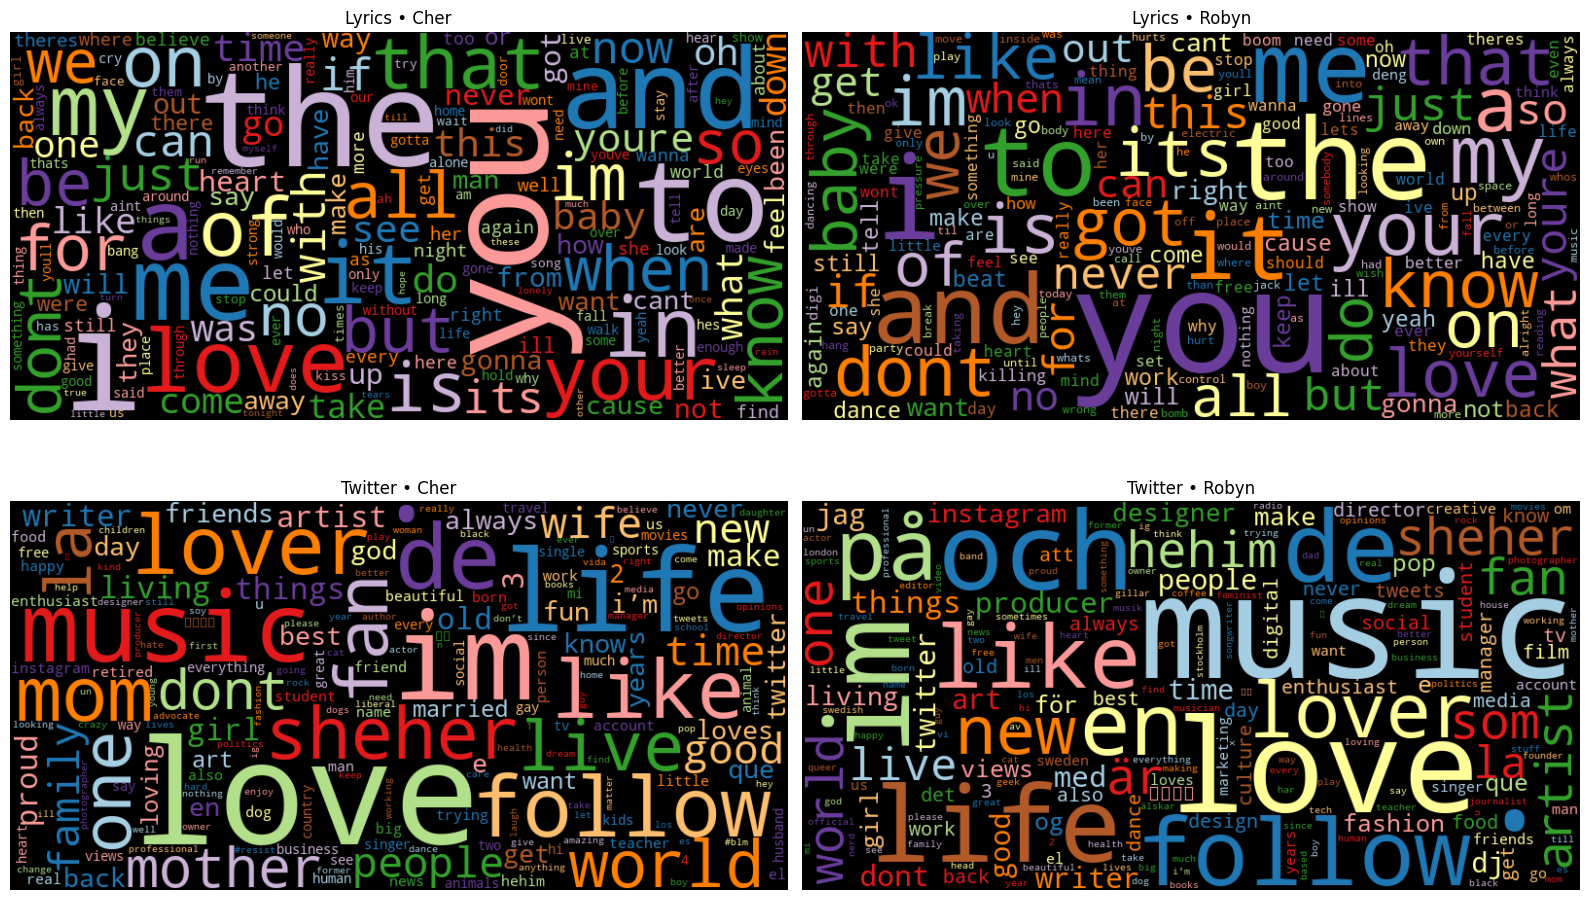

In [36]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

def wordcloud(word_freq, title=None, max_words=200, stopwords=None):
    wc = WordCloud(
        width=800, height=400,
        background_color="black", colormap="Paired",
        max_font_size=150, max_words=max_words
    )

    # pandas Series 
    if isinstance(word_freq, pd.Series):
        counter = Counter(word_freq.fillna(0).to_dict())
    else:
        counter = dict(word_freq)

    if stopwords is not None:
        counter = {tok: freq for tok, freq in counter.items() if tok not in stopwords}

    wc.generate_from_frequencies(counter)
    plt.title(title)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")


def count_words(df, column='tokens', preprocess=None, min_freq=2):
    def update(doc):
        toks = doc if preprocess is None else preprocess(doc)
        counter.update(toks)

    counter = Counter()
    df[column].map(update)

    freq_df = pd.DataFrame.from_dict(counter, orient='index', columns=['freq'])
    freq_df = freq_df.query('freq >= @min_freq')
    freq_df.index.name = 'token'
    return freq_df.sort_values('freq', ascending=False)

# Build word-frequency tables for each
lyric_fillers = {"ooh", "ohh", "ooo", "chorus"}

freq_lyrics_cher  = count_words(lyrics_df.query("artist == 'cher'"),  column="tokens", min_freq=2)
freq_lyrics_robyn = count_words(lyrics_df.query("artist == 'robyn'"), column="tokens", min_freq=2)
freq_tw_cher      = count_words(twitter_df.query("artist == 'cher'"),  column="tokens", min_freq=2)
freq_tw_robyn     = count_words(twitter_df.query("artist == 'robyn'"), column="tokens", min_freq=2)

# word clouds 
plt.figure(figsize=(16, 10))

plt.subplot(2, 2, 1)
wordcloud(freq_lyrics_cher['freq'],  title="Lyrics • Cher",  stopwords=lyric_fillers)

plt.subplot(2, 2, 2)
wordcloud(freq_lyrics_robyn['freq'], title="Lyrics • Robyn", stopwords=lyric_fillers)

plt.subplot(2, 2, 3)
wordcloud(freq_tw_cher['freq'],     title="Twitter • Cher")

plt.subplot(2, 2, 4)
wordcloud(freq_tw_robyn['freq'],    title="Twitter • Robyn")

plt.tight_layout()
plt.show()

Q: What observations do you have about these (relatively straightforward) wordclouds? 

A: Most of these words in the word clouds are pronoun-heavy such as you/I/me and sharing words such as love, time, know; for Cher are more towards romantic (love,heart,baby) and Robyn is more action-oriented orientated (dont, like, never). The Twitter clouds look way different, less “poetic,” more bio keywords. Cher’s followers skew fan/family words (love, follow, life, music, fan, mother), while Robyn’s include industry/creative terms (music, producer, dj, design, pop, instagram) plus pronouns like she/her. Emojis/hashtags also show in the Twitter clouds. Overall: lyrics reflect themes of relationships; bios reflect audience identity—Cher = fandom/personal life, Robyn = music/creative scene.